
Data Set Information (https://archive.ics.uci.edu/ml/datasets/Cardiotocography):

2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified by three expert obstetricians and a consensus classification label assigned to each of them. Classification was both with respect to a morphologic pattern (A, B, C. ...) and to a fetal state (N, S, P). Therefore the dataset can be used either for 10-class or 3-class experiments.


LB — FHR baseline (beats per minute)

AC — # of accelerations per second

FM — # of fetal movements per second

UC — # of uterine contractions per second

DL — # of light decelerations per second

DS — # of severe decelerations per second

DP — # of prolongued decelerations per second

ASTV — percentage of time with abnormal short term variability

MSTV — mean value of short term variability

ALTV — percentage of time with abnormal long term variability

MLTV — mean value of long term variability

Width — width of FHR histogram

Min — minimum of FHR histogram

Max — Maximum of FHR histogram

Nmax — # of histogram peaks

Nzeros — # of histogram zeros

Mode — histogram mode

Mean — histogram mean

Median — histogram median

Variance — histogram variance

Tendency — histogram tendency

CLASS — FHR pattern class code (1 to 10)

NSP — fetal state class code (N=normal; S=suspect; P=pathologic)



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


In [4]:
# Reading the dataset from UCI 
df = pd.read_excel("/content/drive/My Drive/Colab Notebooks/CTG.xls", sheet_name="Raw Data")
df.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,A,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,0.0,0.0,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,0.0,0.0,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,0.0,0.0,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,0.0,0.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


In [ ]:
df.shape

(2130, 40)

In [5]:
# Dropping the useless columns
df2 = df.drop(["FileName", "Date", "SegFile"], axis=1)
df2.head()

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,A,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,0.0,0.0,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,0.0,0.0,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,0.0,0.0,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,0.0,0.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


In [6]:
# And then let's drop the Na values
df2.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


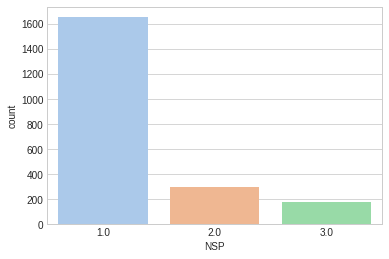

In [7]:
# Count plot for the target (label)
import seaborn as sns
plt.style.use("seaborn-whitegrid")
sns.countplot(x="NSP", data=df2, palette="pastel");

In [8]:
# Assigning X and Y
X = df2.drop(["NSP"], axis=1)
Y = df2["NSP"]

In [9]:
# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify= Y, random_state=123)

In [10]:
# Creating the model and fittting it
multi_log_reg = LogisticRegression(max_iter=300)
multi_log_reg.fit(X_train, Y_train);

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [11]:
y_predicted = multi_log_reg.predict(X_test)

Text(69.0, 0.5, 'Truth')

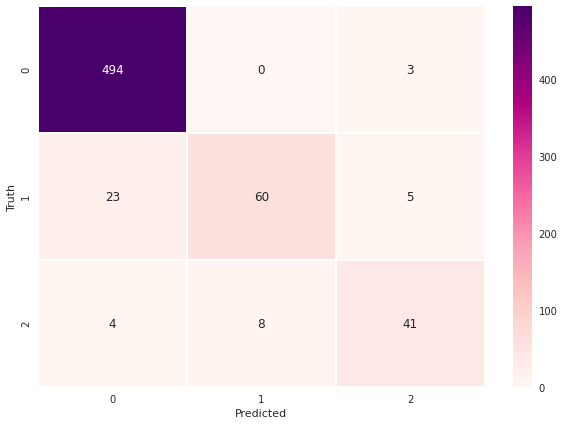

In [13]:
# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_predicted)
plt.style.use("seaborn")
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, linewidth=1, cmap="RdPu", fmt='g')
sns.set(font_scale=1.7)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [14]:
# Model score
multi_log_reg.score(X_test, Y_test)

0.932601880877743

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(Y_test, y_predicted))

Accuracy: 0.932601880877743


In [16]:
# Defining the AUC information (Area Under the Curve) of the ROC (Receiver Operating Characteristic) 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

def multi_roc_auc_scor(Y_test, y_predicted, average="macro"):
  lb = LabelBinarizer()
  lb.fit(Y_test)
  Y_test = lb.transform(Y_test)
  y_predicted = lb.transform(y_predicted)
  return roc_auc_score(Y_test, y_predicted, average=average)
auc = multi_roc_auc_scor(Y_test, y_predicted, average="macro")
print("AUC: %0.2f"% auc)

AUC: 0.87


In [17]:
# MAE (Mean Absolute Erro)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, y_predicted)
mae

0.07836990595611286

In [18]:
# MSE (Mean Squared Error)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, y_predicted)
mse

0.10031347962382445